In [1]:
!pip install yfinance
!pip install pandas numpy matplotlib scikit-learn tensorflow

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.15.0 which is incompatible.
conda-repo-cli 1.0.41 requires clyent==1.2.1

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 493.7 kB/s eta 0:00:06
     ------ --------------------------------- 0.5/3.0 MB 493.7 kB/s eta 0:00:06
     ---------- ----------------------------- 0.8/3.0 MB 479.2 kB/s eta 0:00:05
     ---------- ----------------------------- 0.8/3.0 MB 479.2 kB/s eta 0:00:05
     ---------- ----------------------------- 0.8/3.0 MB 479.2 kB/s eta 0:

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 2.2.2 requires torchvision, which is not installed.
exceptiongroup 1.3.0 requires typing-extensions>=4.6.0; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
fastapi 0.119.0 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.
optree 0.17.0 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
pydantic 2.11.10 requires typing-extensions>=4.12.2, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.33.2 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
starlette 0.48.0 requires typing-extensions>=4.10.0; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
typing-inspecti

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
 
ticker = "AAPL"
data = yf.download(ticker, start="2010-01-01", end="2025-01-01")
 
data.head()


C:\Users\M_Mashayekhi\AppData\Local\Temp\ipykernel_16820\2889638444.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2010-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.418382,6.433078,6.369497,6.400987,493729600
2010-01-05,6.429481,6.465770,6.395590,6.436079,601904800
2010-01-06,6.327211,6.454973,6.320613,6.429480,552160000
2010-01-07,6.315515,6.358102,6.269628,6.350604,477131200
2010-01-08,6.357502,6.358103,6.269929,6.307118,447610800


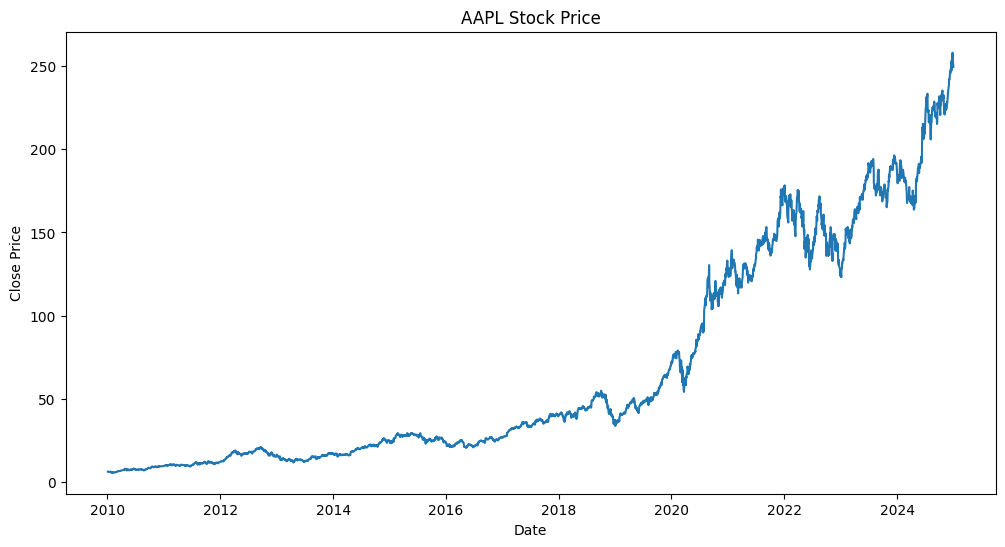

In [4]:
data_close = data[['Close']]
 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_close)
 
plt.figure(figsize=(12,6))
plt.plot(data_close)
plt.title(f"{ticker} Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


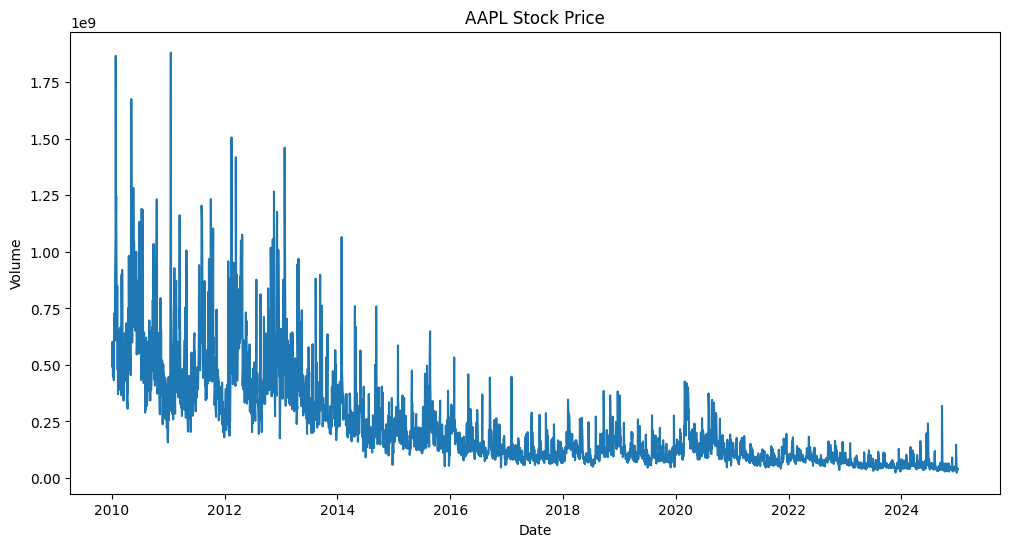

In [5]:
data_volume = data[['Volume']]
 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_volume)
 
plt.figure(figsize=(12,6))
plt.plot(data_volume)
plt.title(f"{ticker} Stock Price")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

In [6]:
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['Momentum'] = data['Close'] - data['Close'].shift(10)
data['Daily_Return'] = data['Close'].pct_change()
 
data = data.dropna()
data.head()

Price,Close,High,Low,Open,Volume,MA10,MA50,Momentum,Daily_Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2010-03-16,6.731489,6.747384,6.673307,6.723392,446908000,6.616984,6.206868,0.467858,0.002725
2010-03-17,6.721593,6.791472,6.696101,6.744986,450956800,6.661340,6.212933,0.443568,-0.001470
2010-03-18,6.737488,6.747985,6.676306,6.720992,342109600,6.703148,6.219093,0.418075,0.002365
2010-03-19,6.665509,6.755182,6.634918,6.741686,559445600,6.713045,6.225859,0.098969,-0.010683
2010-03-22,6.740488,6.777977,6.602529,6.612126,456419600,6.730050,6.234358,0.170050,0.011249


In [7]:
features = data[['Close', 'Volume', 'MA10', 'MA50', 'Momentum', 'Daily_Return']].values

sequence_lengths = [30, 60, 90]
lstm_units_list = [(50, 25), (100, 50)]
features_sets = [
    ['Close', 'Volume'],   
    ['Close', 'Volume', 'MA10', 'MA50', 'Momentum', 'Daily_Return']   
]

In [8]:
train_size = int(len(features)*0.7)
val_size = int(len(features)*0.2)

train_data = features[:train_size]
val_data = features[train_size:train_size+val_size]
test_data = features[train_size+val_size:]
 
scaler = MinMaxScaler()
scaler.fit(train_data)  
 
train_scaled = scaler.transform(train_data)
val_scaled = scaler.transform(val_data)
test_scaled = scaler.transform(test_data)


In [9]:
def create_sequences(data_array, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data_array)):
        X.append(data_array[i-seq_length:i])
        y.append(data_array[i, 0])   
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(train_scaled, seq_length)
X_val, y_val = create_sequences(val_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

print(X_train.shape, y_train.shape)

(2547, 60, 6) (2547,)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))   

 
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mean_squared_error')
history = model.fit( X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val)) 

Epoch 1/50
81/81 [==============================] - 6s 34ms/step - loss: 0.0090 - val_loss: 0.0119
Epoch 2/50
81/81 [==============================] - 2s 25ms/step - loss: 0.0013 - val_loss: 0.0052
Epoch 3/50
81/81 [==============================] - 2s 25ms/step - loss: 0.0012 - val_loss: 0.0068
Epoch 4/50
81/81 [==============================] - 2s 25ms/step - loss: 0.0013 - val_loss: 0.0047
Epoch 5/50
81/81 [==============================] - 2s 24ms/step - loss: 0.0011 - val_loss: 0.0123
Epoch 6/50
81/81 [==============================] - 2s 24ms/step - loss: 0.0010 - val_loss: 0.0042
Epoch 7/50
81/81 [==============================] - 2s 25ms/step - loss: 9.3184e-04 - val_loss: 0.0040
Epoch 8/50
81/81 [==============================] - 2s 26ms/step - loss: 9.1043e-04 - val_loss: 0.0041
Epoch 9/50
81/81 [==============================] - 2s 25ms/step - loss: 9.4560e-04 - val_loss: 0.0040
Epoch 10/50
81/81 [==============================] - 2s 27ms/step - loss: 9.9384e-04 - val_loss: 

In [12]:
pred_scaled = model.predict(X_test)
 
pred_full = np.zeros((pred_scaled.shape[0], features.shape[1]))
pred_full[:,0] = pred_scaled[:,0]   
pred_original = scaler.inverse_transform(pred_full)[:,0]
 
y_test_full = np.zeros((y_test.shape[0], features.shape[1]))
y_test_full[:,0] = y_test
y_test_original = scaler.inverse_transform(y_test_full)[:,0]


11/11 [==============================] - 1s 8ms/step


In [13]:
mae = mean_absolute_error(y_test_original, pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, pred_original))
print("MAE:", mae, "RMSE:", rmse)

MAE: 12.188202702882643 RMSE: 13.984557510875147


In [15]:
results = []
for features_list in features_sets:
    features = data[features_list].values
    
    for seq_length in sequence_lengths:
        
        def create_sequences(data_array, seq_length):
            X, y = [], []
            for i in range(seq_length, len(data_array)):
                X.append(data_array[i-seq_length:i])
                y.append(data_array[i,0])   
            return np.array(X), np.array(y)
         
        train_size = int(len(features)*0.7)
        val_size   = int(len(features)*0.2)
        train_data = features[:train_size]
        val_data   = features[train_size:train_size+val_size]
        test_data  = features[train_size+val_size:]

        scaler = MinMaxScaler()
        scaler.fit(train_data)
        train_scaled = scaler.transform(train_data)
        val_scaled   = scaler.transform(val_data)
        test_scaled  = scaler.transform(test_data)

        X_train, y_train = create_sequences(train_scaled, seq_length)
        X_val, y_val     = create_sequences(val_scaled, seq_length)
        X_test, y_test   = create_sequences(test_scaled, seq_length)

        for units in lstm_units_list: 
            model = Sequential()
            model.add(LSTM(units[0], return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
            model.add(Dropout(0.2))
            model.add(LSTM(units[1]))
            model.add(Dropout(0.2))
            model.add(Dense(1))
            model.compile(optimizer=Adam(0.0005), loss='mean_squared_error')
 
            model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)

           
            pred_scaled = model.predict(X_test)
            pred_full = np.zeros((pred_scaled.shape[0], features.shape[1]))
            pred_full[:,0] = pred_scaled[:,0]
            pred_original = scaler.inverse_transform(pred_full)[:,0]

            y_test_full = np.zeros((y_test.shape[0], features.shape[1]))
            y_test_full[:,0] = y_test
            y_test_original = scaler.inverse_transform(y_test_full)[:,0]

            
            rmse = np.sqrt(mean_squared_error(y_test_original, pred_original))
            print(f"Feature List:{features_list}  Sequence Length: {seq_length} LSTM Units: {units} -----> RMSE: {rmse}")
             
            results.append({
                'features': features_list,
                'seq_length': seq_length,
                'lstm_units': units,
                'rmse': rmse
            })
 
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='rmse')
print(results_df)

11/11 [==============================] - 1s 6ms/step
Feature List:['Close', 'Volume']  Sequence Length: 30 LSTM Units: (50, 25) -----> RMSE: 30.99434597759099
11/11 [==============================] - 1s 8ms/step
Feature List:['Close', 'Volume']  Sequence Length: 30 LSTM Units: (100, 50) -----> RMSE: 14.532109510506613
10/10 [==============================] - 1s 11ms/step
Feature List:['Close', 'Volume']  Sequence Length: 60 LSTM Units: (50, 25) -----> RMSE: 29.01498156986502
10/10 [==============================] - 1s 19ms/step
Feature List:['Close', 'Volume']  Sequence Length: 60 LSTM Units: (100, 50) -----> RMSE: 15.589236278203929
9/9 [==============================] - 1s 16ms/step
Feature List:['Close', 'Volume']  Sequence Length: 90 LSTM Units: (50, 25) -----> RMSE: 22.339950982174464
9/9 [==============================] - 1s 27ms/step
Feature List:['Close', 'Volume']  Sequence Length: 90 LSTM Units: (100, 50) -----> RMSE: 11.459595496097855
11/11 [==============================] 